In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def trend(time, slope=0):
    """A trend over time"""
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 * np.pi),
                    1 / np.exp(5 * season_time))


def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)


def noise(time, noise_level=1, seed=None):
    """Adds noise to the series"""
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level


def plot_series(time, series, format="-", title="", label=None, start=0, end=None):
    """Plot the series"""
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(title)
    if label:
        plt.legend()
    plt.grid(True)

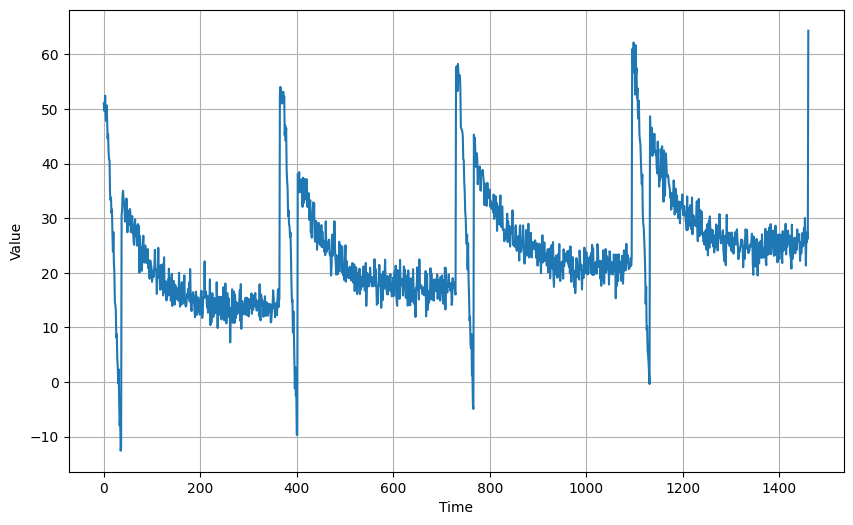

In [6]:
# The time dimension or the x-coordinate of the time series
TIME = np.arange(4 * 365 + 1, dtype="float32")

# Initial series is just a straight line with a y-intercept
y_intercept = 10
slope = 0.01
SERIES = trend(TIME, slope) + y_intercept

# Adding seasonality
amplitude = 40
SERIES += seasonality(TIME, period=365, amplitude=amplitude)

# Adding some noise
noise_level = 2
SERIES += noise(TIME, noise_level, seed=42)

# Plot the series
plt.figure(figsize=(10, 6))
plot_series(TIME, SERIES)
plt.show()

In [10]:
# Define time step to split the series
SPLIT_TIME = 1100

# Define the window size for forecasting later on
WINDOW_SIZE = 50

In [8]:
def train_val_split(time, series):
    """Split time series into train and validation sets

    Args:
        time (np.ndarray): array with timestamps
        series (np.ndarray): array with values of the time series

    Returns:
        (np.ndarray, np.ndarray, np.ndarray, np.ndarray): tuple containing timestamp and 
                                                          series values for train and validation
    """

    # Get train split
    time_train = time[:SPLIT_TIME]
    series_train = series[:SPLIT_TIME]

    # Get validation split
    time_valid = time[SPLIT_TIME:]
    series_valid = series[SPLIT_TIME:]

    return time_train, series_train, time_valid, series_valid

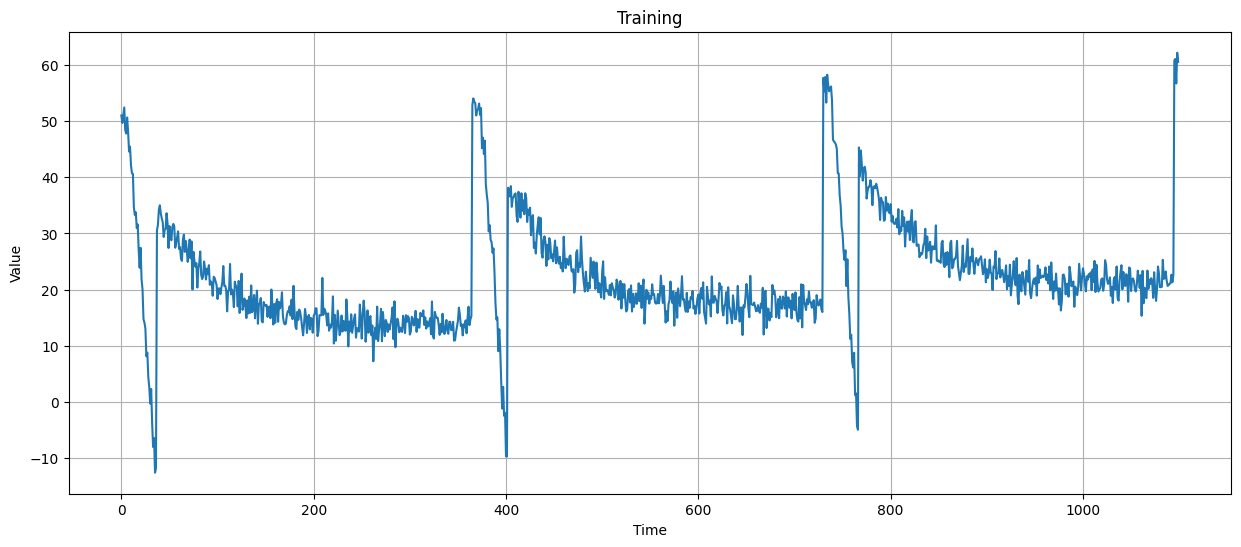

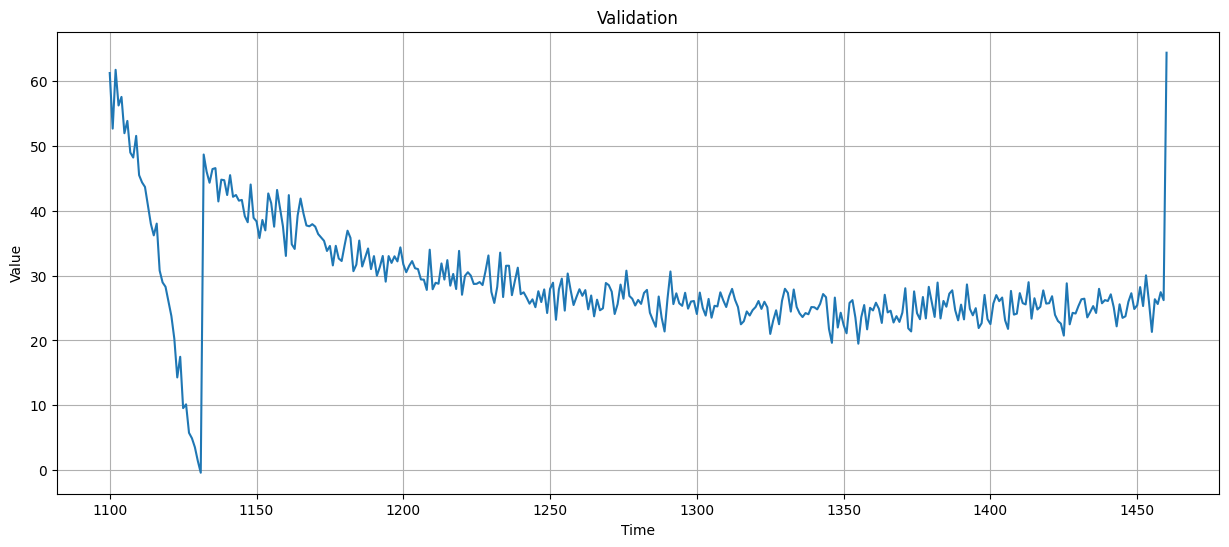

In [12]:
# Get your train and validation splits
time_train, series_train, time_valid, series_valid = train_val_split(TIME, SERIES)

plt.figure(figsize=(15, 6))
plot_series(time_train, series_train, title="Training")

plt.figure(figsize=(15, 6))
plot_series(time_valid, series_valid, title="Validation")

In [15]:
def compute_metrics(true_series, forecast):
    """compute mean squared error and mean absolute error for predictions

    Args:
        true_series (np.ndarray): original (true) series
        forecast (np.ndarray): forecast series

    Returns:
        (np.float64, np.float64): MSE and MAE
    """
    
    mse = tf.keras.metrics.mse(true_series, forecast)
    mae = tf.keras.metrics.mae(true_series, forecast)

    return mse, mae

In [17]:
# Try out compute_metrics function

# Define some dummy series for testing
zeros = np.zeros(5)
ones = np.ones(5)

mse, mae = compute_metrics(zeros, ones)
print(f"mse: {mse}, mae: {mae} for series of zeros and prediction of ones\n")

mse, mae = compute_metrics(ones, ones)
print(f"mse: {mse}, mae: {mae} for series of ones and prediction of ones")

mse: 1.0, mae: 1.0 for series of zeros and prediction of ones

mse: 0.0, mae: 0.0 for series of ones and prediction of ones


In [19]:
# naive_forecast

naive_forecast = SERIES[SPLIT_TIME-1:-1]


In [20]:
# Look into naive_forecast
print(f"validation series has shape: {series_valid.shape}\n")
print(f"naive forecast has shape: {naive_forecast.shape}\n")
print(f"comparable with validation series: {series_valid.shape == naive_forecast.shape}")

validation series has shape: (361,)

naive forecast has shape: (361,)

comparable with validation series: True


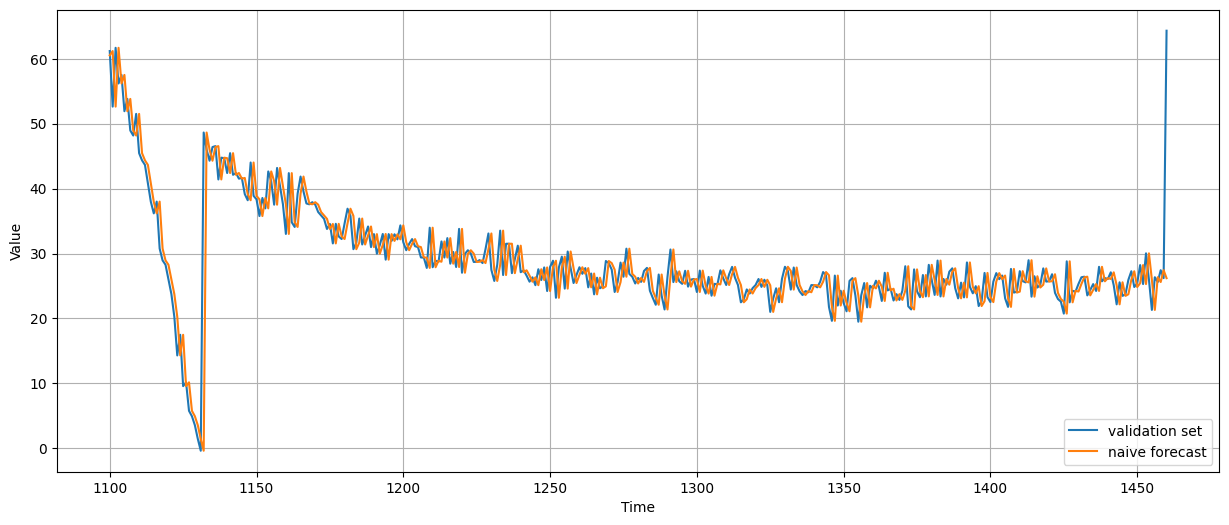

In [22]:
# Plot the validation data and the naive forecast
plt.figure(figsize=(15, 6))
plot_series(time_valid, series_valid, label="validation set")
plot_series(time_valid, naive_forecast, label="naive forecast")

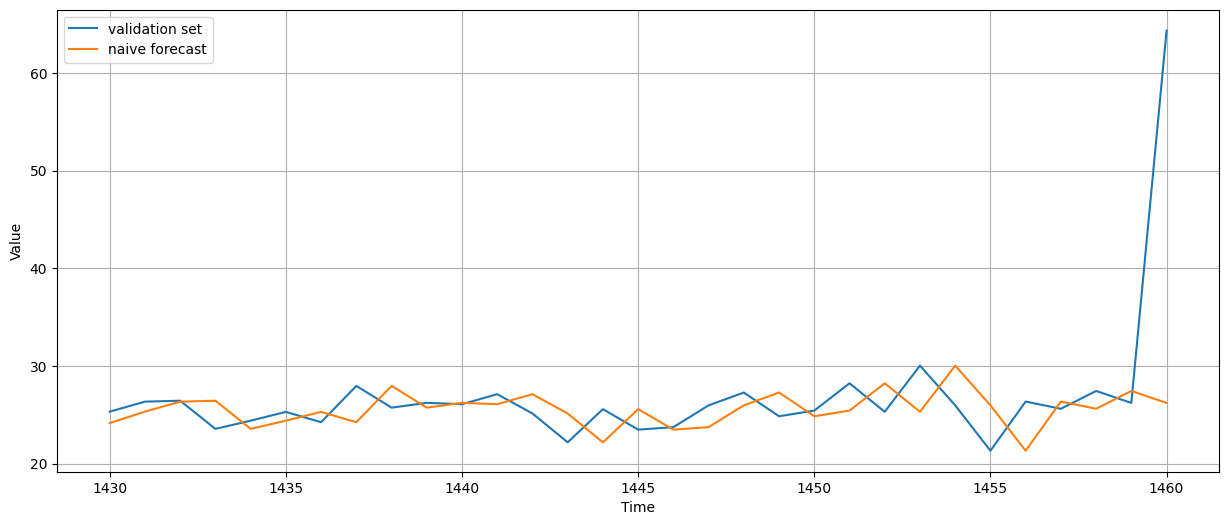

In [23]:
# Let's zoom in on the end of the validation period:

plt.figure(figsize=(15, 6))
plot_series(time_valid, series_valid, start=330, end=361, label="validation set")
plot_series(time_valid, naive_forecast, start=330, end=361, label="naive forecast")

In [24]:
mse, mae = compute_metrics(series_valid, naive_forecast)

print(f"mse: {mse:.2f}, mae: {mae:.2f} for naive forecast")

mse: 19.58, mae: 2.60 for naive forecast
